In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sxs
import h5py as h5

In [19]:
f = h5.File("/urania/ptmp/pjn/EOB_Fitting/FirstRun/Ev/JoinedLev3/GW2/rh_FiniteRadii_CodeUnits.h5", 'r')
print(list(f.keys())[0])
int(list(f.keys())[0][1:5])

R0899.dir


899

In [9]:
closest_radii = np.array(f['R0899.dir']['Y_l2_m2.dat'])
closest_radii[:,0]

array([   0.        ,    4.55868938,    9.11844987, ..., 3738.14303377,
       3738.82272833, 3739.50945917])

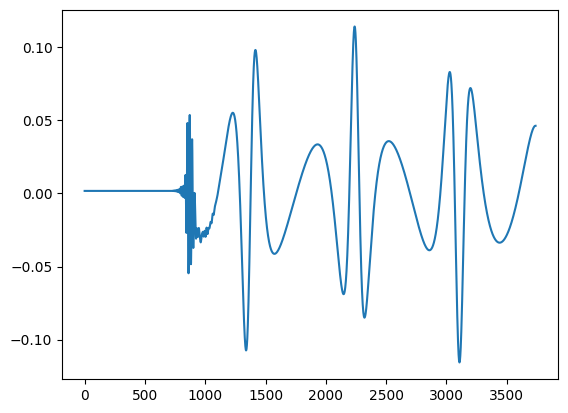

In [10]:
plt.plot(closest_radii[:,0], closest_radii[:,1])

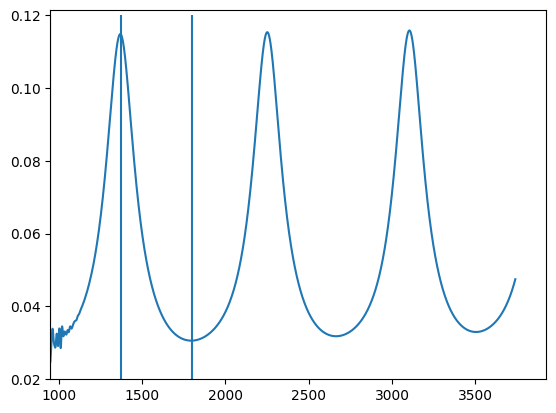

In [30]:
plt.plot(closest_radii[:,0], np.sqrt(closest_radii[:,1]**2.+closest_radii[:,2]**2.))
plt.ylim(0.02,)
plt.xlim(950,)
plt.vlines([950,1375,1800], [0.02, 0.02, 0.02], [0.12, 0.12, 0.12])

In [32]:
wave_mag = np.sqrt(closest_radii[:,1]**2.+closest_radii[:,2]**2.)
t = closest_radii[:,0]

In [35]:
t_start_for_extrema = np.argmin(np.abs(t - 200 - int(list(f.keys())[0][1:5])))

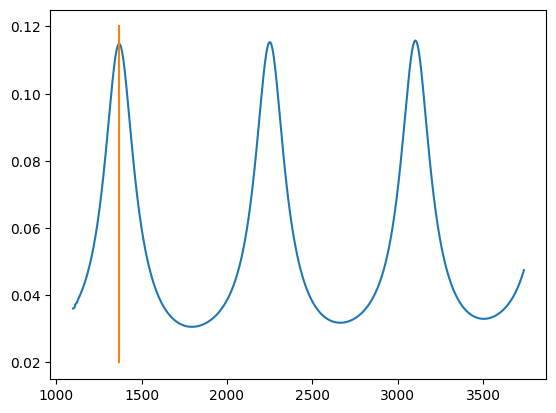

In [43]:
plt.plot(t[t_start_for_extrema:], wave_mag[t_start_for_extrema:])
plt.plot([t[377+t_start_for_extrema], t[377+t_start_for_extrema]], [0.02, 0.12])

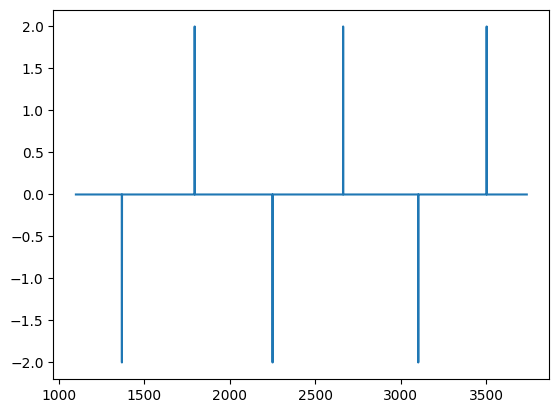

In [40]:
plt.plot(t[t_start_for_extrema:-2], np.diff(np.sign(np.diff(wave_mag[t_start_for_extrema:]))))

In [41]:
np.nonzero(np.diff(np.sign(np.diff(wave_mag[t_start_for_extrema:]))))

(array([ 377,  974, 1616, 2198, 2826, 3395]),)

In [55]:
wave_mag

array([0.00166663, 0.00166762, 0.0016703 , ..., 0.04724753, 0.04736378,
       0.0474821 ])

In [53]:
def first_two_extrema(data):
    extrema = np.nonzero(np.diff(np.sign(np.diff(data))))
    print(extrema[0])
    return extrema[0][:2]

In [54]:
first_two_extrema(t[t_start_for_extrema:], wave_mag[t_start_for_extrema:])

[ 377  974 1616 2198 2826 3395]


array([377, 974])